## Summary

This codes creates a decision tree, which rests on the <a href= "https://en.wikipedia.org/wiki/ID3_algorithm">ID3 (Iterative Dichotomiser 3)</a> algorithm. The supervised learning decision tree algorithm enables to make predictions about observations recognizing nonlinear interactions between variables.

The predictions made here are "whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset". The data set is taken from the <a href = "http://archive.ics.uci.edu/ml/datasets/Adult">Center for Machine Learning and Intelligent Systems</a>.


## Import packages

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
import seaborn as sns
import numpy as np
import math

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

## Import data

In [103]:
income = pd.read_csv("income.csv", index_col=False)

## Explore data

In [104]:
income.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [105]:
income.tail(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [106]:
income.shape

(32561, 15)

In [107]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'high_income'],
      dtype='object')

In [108]:
income.index

RangeIndex(start=0, stop=32561, step=1)

In [109]:
income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
high_income       object
dtype: object

In [110]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
high_income       32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [111]:
income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Missing values?

In [112]:
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
high_income       0
dtype: int64

#### Data visualizations - numeric variables

In [113]:
income_numerics = income.iloc[:,np.r_[0, 2, 4, 10:13]]
income_numerics.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40


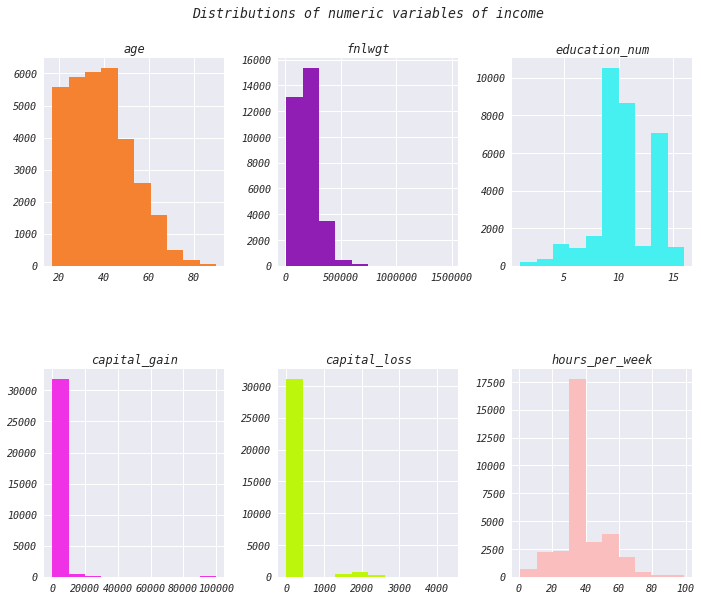

In [114]:
# Prepare color list assign each plot a different color
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

np.warnings.filterwarnings('ignore')

income_numerics_names=list(income_numerics.columns)

fig, axs = plt.subplots(2,3, figsize=(15,9))
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)

axs = axs.ravel()
fig.suptitle('Distributions of numeric variables of income')


for i in range(0,6):
    axs[i].hist(income_numerics.iloc[:,i], color=color_list[i])
    axs[i].set_title(income_numerics_names[i])
plt.show()

In [115]:
income_numerics_corr_matrix=income_numerics.corr()
income_numerics_corr_matrix.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123


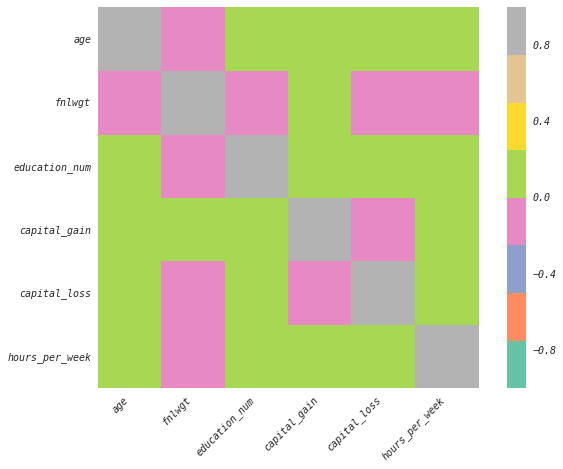

In [116]:

dimensions_1 = (10, 7)
fig, ax = plt.subplots(figsize=dimensions_1)

ax = sns.heatmap(
    income_numerics_corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap="Set2",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Data visualizations - categorical variables

In [117]:
income_cat = income.iloc[:,np.r_[1, 3, 4:10, 13:15]]
print(income_cat.shape)
income_cat.head(3)

(32561, 10)


,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country,high_income
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


In [118]:
income['high_income'].value_counts()

 <=50K    24720
 >50K      7841
Name: high_income, dtype: int64

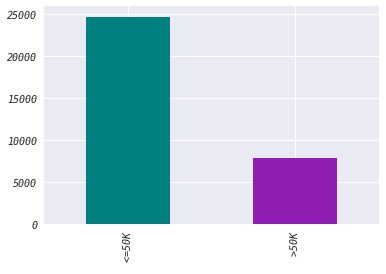

In [119]:
income['high_income'].value_counts().plot(kind="bar", color=['#008080', '#911eb4'])

In [120]:
income_cat.iloc[:,1].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

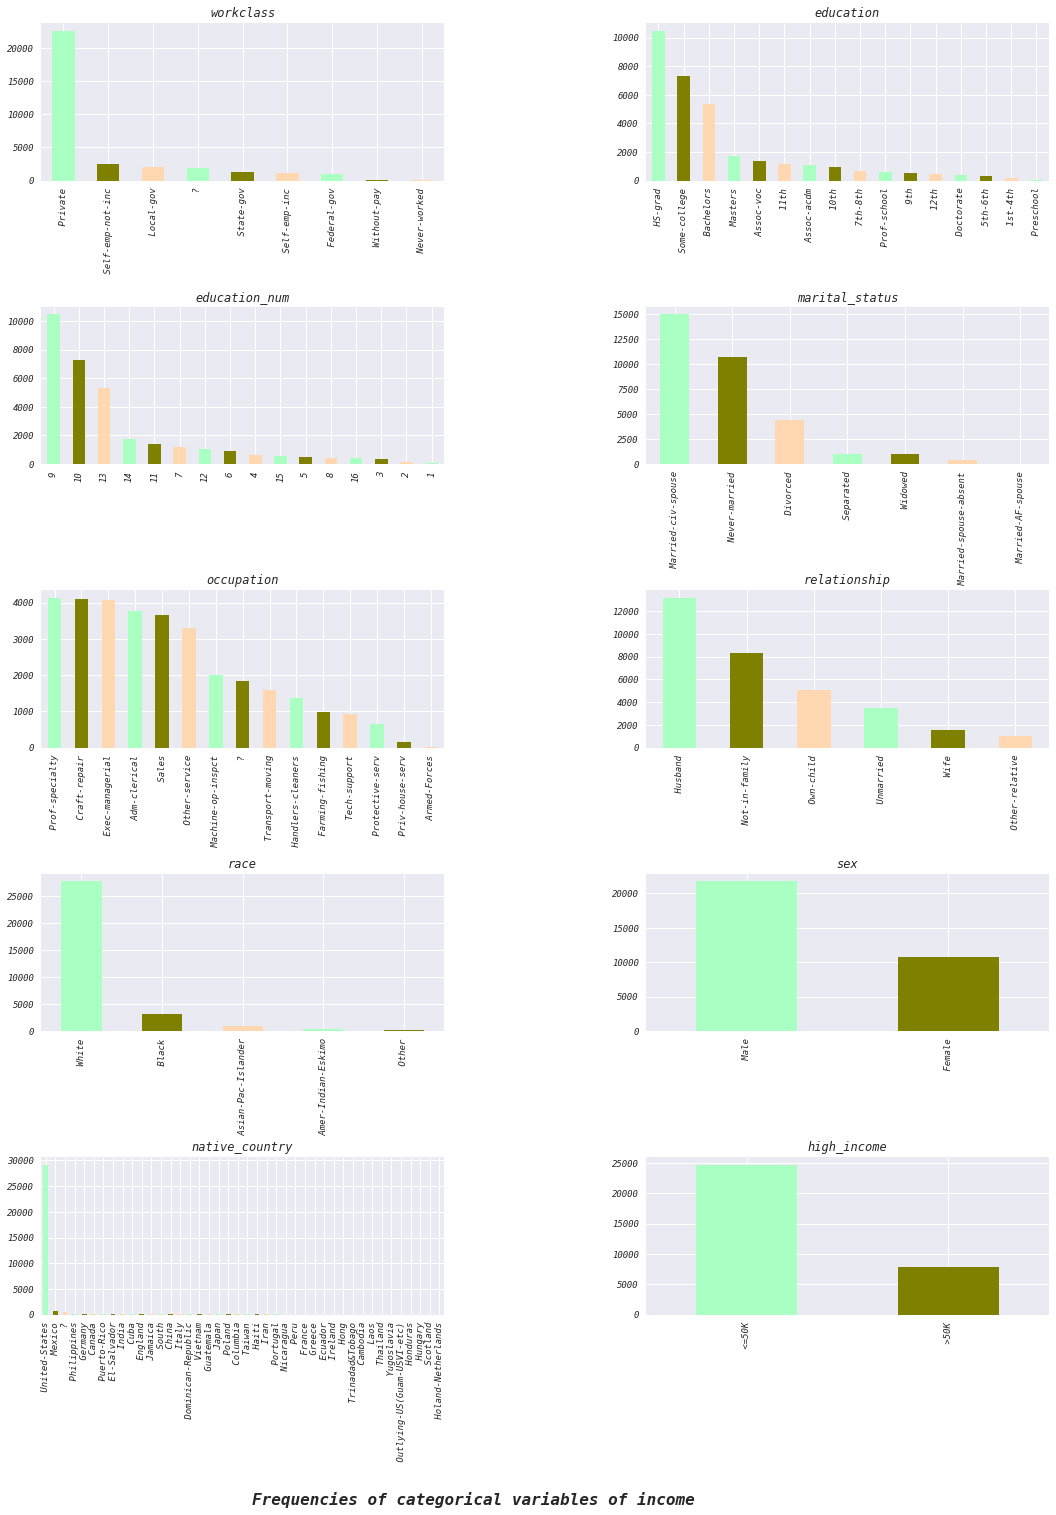

In [121]:
# Prepare color list assign each plot a different color
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

np.warnings.filterwarnings('ignore')

income_cat_names=list(income_cat.columns)

fig, axs = plt.subplots(5,2, figsize=(20,6))
plt.subplots_adjust(left=0.1, bottom=0.01, right=0.8, top=3, wspace=.5, hspace=0.8)

axs = axs.ravel()
fig.suptitle('Frequencies of categorical variables of income',  x=0.4, y=-0.4, fontsize=16, fontweight="heavy")


for i in range(0,10):
    for n in color_list:
        # axs[i].bar(x=income_cat.iloc[:,i].unique(), height=income_cat.iloc[:,i], color=color_list[i])
        income_cat.iloc[:,i].value_counts().plot(kind="bar", ax=axs[i], color=['#aaffc3', '#808000', '#ffd8b1'],
                                                 title=income_cat_names[i], rot=90, fontsize=9)
    # axs[i].set_title(income_cat_names[i])
plt.show()

#### Aggregations

In [122]:
income_age = income.groupby('age')[['capital_gain', 'capital_loss', 'hours_per_week']].aggregate([
                                    'mean', 'std', 'median', 'min', 'max', 'count']).T

income_age.head(3)

age                           17           18           19           20  \
capital_gain mean     109.691139   102.058182    92.092697    82.786189   
             std     1722.554867  1478.176635  1412.892408  1282.429902   
             median     0.000000     0.000000     0.000000     0.000000   

age                           21           22          23           24  \
capital_gain mean     204.625000   352.631373  103.099202   280.729323   
             std     3751.053585  5176.907626  806.897255  3682.241765   
             median     0.000000     0.000000    0.000000     0.000000   

age                           25           26     ...                80  \
capital_gain mean     279.297265   341.630573     ...        546.090909   
             std     1725.834497  3724.769426     ...       2266.637638   
             median     0.000000     0.000000     ...          0.000000   

age                          81   82           83   84   85   86   87   88  \
capital_gain mean    249.900000  0.0  3341.833333  0.0  0.0  0.0  0.0  0.0   
             std     782.134051  0.0  8185.786472  0.0  0.0  NaN  NaN  0.0   
             median    0.000000  0.0     0.000000  0.0  0.0  0.0  0.0  0.0   

age                           90  
capital_gain mean    1935.255814  
             std     4863.944554  
             median     0.000000  

[3 rows x 73 columns]

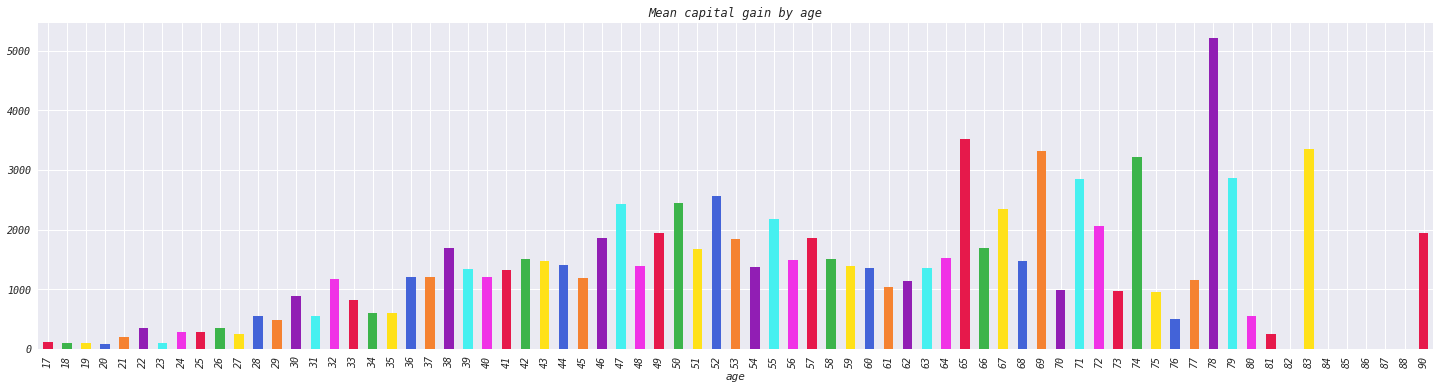

In [123]:
income_age.loc[('capital_gain', 'mean'),:].plot(kind="bar", figsize=(25,6), title="Mean capital gain by age",
                                                color=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6'])

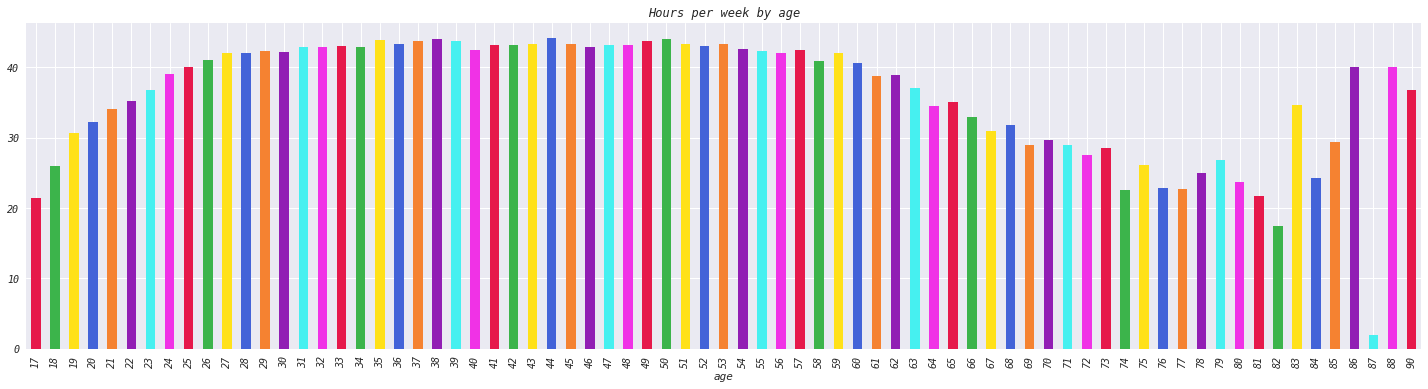

In [124]:
income_age.loc[('hours_per_week', 'mean'),:].plot(kind="bar", figsize=(25,6), title="Hours per week by age",
                                                color=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6'])

#### Converting categorical variables into numerical variables.

In [125]:
income_2 = income.copy()
income_2.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
high_income       object
dtype: object

In [126]:
numeric_sex = pd.Categorical(income_2.sex)
income_2['sex']=numeric_sex.codes
print(income.sex.head(5))
print(income_2.sex.head(5))

0       Male
1       Male
2       Male
3       Male
4     Female
Name: sex, dtype: object
0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: int8


In [127]:
if type(income_2.loc[5,'race']) == str:
    print('test')
else:
    print('test_2')

test


In [128]:
income_2_names = list(income_2.columns)
for name in income_2_names:
    if type(income_2.loc[5, name])==str:
        numeric = pd.Categorical(income_2.loc[:,name])
        income_2[name] = numeric.codes

In [129]:
print(income_2.dtypes)
# conversion was successful

age               int64
workclass          int8
fnlwgt            int64
education          int8
education_num     int64
marital_status     int8
occupation         int8
relationship       int8
race               int8
sex                int8
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country     int8
high_income        int8
dtype: object


In [130]:
income_2.loc[0:3, income_cat.columns]

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country,high_income
0,7,9,13,4,1,1,4,1,39,0
1,6,9,13,2,4,0,4,1,39,0
2,4,11,9,0,6,1,4,1,39,0
3,4,1,7,2,6,0,2,1,39,0


Categorical variables are coded with numbers and not longer with strings.

#### Simulating splits based on conditions.

Do people work in the private or public sector?

In [131]:
public = income_2.query('workclass==4')
public[0:3]['workclass']
public.shape

(22696, 15)

In [132]:
private = income_2.query('workclass !=4')
private[0:3]['workclass']
print(private.shape)
print(income_2.shape[0])

(9865, 15)
32561


In [133]:
fraction_private = private.shape[0] / income_2.shape[0]
print(round(fraction_private,2))

fraction_public = public.shape[0] / income_2.shape[0]
print(round(fraction_public,2))

0.3
0.7


The probability of working in the private sector is 0.3 . The probability of working in the public sector is 0.7.
The probability of working the public sector is higher than working in the private sector at this split.

Is the person White or not?

In [134]:
print(income.race.unique())
print(income_2.race.unique())

white = income_2.query('race==4')
not_white = income_2.query('race!=4')    

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[4 2 1 0 3]


Is the person a man or woman?

In [135]:
print(income.sex.unique())
print(income_2.sex.unique())
man = income_2.query('sex==1')
woman = income_2.query('sex==0')
woman[0:3]['sex']

[' Male' ' Female']
[1 0]


4    0
5    0
6    0
Name: sex, dtype: int8

In [136]:
print(income.high_income.unique())
print(income_2.high_income.unique())

lower_50k = income_2.query('high_income == 0')
higher_50k = income_2.query('high_income == 1')

print(higher_50k[0:3]['high_income'])
print(lower_50k[0:3]['high_income'])

[' <=50K' ' >50K']
[0 1]
7    1
8    1
9    1
Name: high_income, dtype: int8
0    0
1    0
2    0
Name: high_income, dtype: int8


In [137]:
fraction_lower_50k = lower_50k.shape[0] / income_2.shape[0]
print(round(fraction_lower_50k,2))

fraction_higher_50k = higher_50k.shape[0] / income_2.shape[0]
print(round(fraction_higher_50k,2))

0.76
0.24


The target variable is income below or above 50k. This is the variable to be predicted. The probability of
an income lower is 76% and higher only 24%. In this case the probability of the variable 'high_income'
is independent of the other variables in the data set. In a decision tree this is not the case. The target 
variable at the end of the tree at the "terminal node" is dependent on other variables beforehand.
In this case if the person works in the public sector is non-white or a female. This changes the probability
and increases the number of terminal nodes. The prediction is the terminal node with a probability of 1. 
The question is then how each split moves the tree forward to this prediction or what is the information gain
at each node. One way to determine the information gain is based on the <a href="https://en.wikipedia.org/wiki/Entropy_%28information_theory%29">entropy</a> metric.

#### Calculating entropy - high income

In [138]:
# entropy H or eta is based on frequency probabilities
print(lower_50k.shape[0])
print(higher_50k.shape[0])
print(income.shape[0])

print(math.log(1,2))
print(math.log(4,2))
print(math.log(8,2))

24720
7841
32561
0.0
2.0
3.0


Assuming all observations are of low income. Then the uncertainty measured by entropy would be 0. 
The prediction would always be low income.

In [139]:
length_income = income.shape[0]

H_all_low_income = (length_income /length_income * math.log(length_income /length_income, 2))
print(H_all_low_income )

0.0


This is here not the case. The frequencies are unequally distributed. This creates uncertainty about
the outcomes (or predictions).

In [140]:


first_term_low = (fraction_lower_50k  * math.log(fraction_lower_50k , 2))
print(first_term_low)
second_term_high = (fraction_higher_50k * math.log(fraction_higher_50k,2))
print(second_term_high)

H = -(first_term_low + second_term_high )
# the entropy is represented by H or eta
print(round(H,4))

-0.30175258924392045
-0.49463136595829277
0.7964


What is the information gain?<br> For this we will assume a state of total uncertainty about the outcomes,
where the entropy H is 1. <br>This is the case when the frequencies of high and low income are equal.

In [141]:
H_equal = -(((length_income/2)/length_income * math.log((length_income/2)/length_income, 2)) + 
            ((length_income/2)/length_income * math.log((length_income/2)/length_income, 2))) 

print(H_equal )

1.0


Information gain<br>
comparing a state of total uncertainty with an entropy of 1 to a state of diffused uncertainty given an
unequal distribution of 24720 people with low income and 7841 of high income generating an entropy of 0.7964.
Then the information gain - IG - is simply:

In [142]:
IG = H_equal - H
print(round(IG,4))

0.2036


#### Entropy and information gain for every unique value of a variable caluclated with functions
<p>
The first functions adjust the entropy for the number of unique values (attributes) and the subsequent
function not, which results in an entropy above one.
</p>

In [143]:
def entropy_ig_k(v, df):
    
    # https://stats.stackexchange.com/questions/95261/why-am-i-getting-information-entropy-greater-than-1/96461#96461
    cat = len(df[v].unique())
    
    freq_list = []
    for i in df[v].unique():
        
        freq = df[df[v]==i]
        freq_list.append(freq)
    
    length_freq = []
    for b in freq_list:
        c=b.shape[0]
        length_freq.append(c)
        
    total = sum(length_freq)   # or: df.shape[0] 
    
    term_results = []
    for d in length_freq:
        fraction = d / total
        term=fraction * math.log(fraction, cat)
        term_results.append(term)
    
    entropy = round(-sum(term_results),4)
    
    IG = 1-entropy
    
    
    return (entropy, IG)

In [144]:

print(entropy_ig_k('high_income', income_2))
print(entropy_ig_k('race', income_2))
print(entropy_ig_k('sex', income_2))
print(entropy_ig_k('workclass', income_2))

(0.7964, 0.2036)
(0.344, 0.656)
(0.9157, 0.08430000000000004)
(0.5199, 0.48009999999999997)


In [145]:
def entropy_ig(v, df):
    
    # https://stats.stackexchange.com/questions/95261/why-am-i-getting-information-entropy-greater-than-1/96461#96461
    # cat = len(df[v].unique())
    
    freq_list = []
    for i in df[v].unique():
        
        freq = df[df[v]==i]
        freq_list.append(freq)
    
    length_freq = []
    for b in freq_list:
        c=b.shape[0]
        length_freq.append(c)
        
    total = sum(length_freq)   # or: df.shape[0] 
    
    term_results = []
    for d in length_freq:
        fraction = d / total
        term=fraction * math.log(fraction, 2)
        term_results.append(term)
    
    entropy = round(-sum(term_results),4)
    
    IG = 1-entropy
    
    
    return (entropy, IG)

In [146]:
H_high_income = entropy_ig('high_income', income_2)
print(H_high_income)
# results are same as above

(0.7964, 0.2036)


In [147]:
print(income_2.race.unique())
entropy_ig('race', income_2)

[4 2 1 0 3]


(0.7987, 0.20130000000000003)

In [148]:
print(income_2.marital_status.unique())
entropy_ig('marital_status', income_2)

[4 2 0 3 5 1 6]


(1.8336, -0.8335999999999999)

In [149]:
print(income_2.sex.unique())
entropy_ig('sex', income_2)

[1 0]


(0.9157, 0.08430000000000004)

In [150]:
print(income_2.workclass.unique())
entropy_ig('workclass', income_2)

[7 6 4 1 2 0 5 8 3]


(1.648, -0.6479999999999999)

It seems that race has got the highest information gain.

#### Entropy variable split by median

Instead of splitting on all states or unique values of a variable, which would result in a higher rammifiation of the tree, it is usual to split the tree in two unique values: one unique value above the median and one value below the median.

In [151]:
income_3 = income_2.copy()
median_age = np.median(income_3.age)

income_3['split_age'] = np.where(income_3.age <= median_age, 0, 1)


print(median_age)
print(income_3.columns)
print(income_3.split_age.value_counts())
print(income_2.age.value_counts()[:5])
print(len(income_2.query('age<=37')))
print(income_3.head())

37.0
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'high_income', 'split_age'],
      dtype='object')
0    16681
1    15880
Name: split_age, dtype: int64
36    898
31    888
34    886
23    877
35    876
Name: age, dtype: int64
16681
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1     4    1          2174             0   
1           4             

In [152]:
H_split_age = entropy_ig('split_age', income_3)
print(H_split_age)

(0.9996, 0.00039999999999995595)


The frequencies are relatively equally distributed on the two branches. Consequently the uncertainty expressed
in entropy approaches 1 and the information gain is relatively small.

In [153]:
print(income.high_income.unique())
print(income_2.high_income.unique())
# below 50 k is 0
# above 50 k is 1
print(income_3['split_age'].unique())
# below median age is 0
# above median age 1

[' <=50K' ' >50K']
[0 1]
[1 0]


#### Contingency

In [154]:
cont_1 = income_3.loc[:, ['high_income', 'split_age']]
cont_1.head()

,high_income,split_age
0,0,1
1,0,1
2,0,1
3,0,1
4,0,0


In [155]:

def label_12(row):
    if (row['high_income']==0) and (row['split_age'] == 0):
        return "below 50k and below median age"
    elif (row['high_income']==1) and (row['split_age'] == 1):
        return "above 50k and above median age"
    elif (row['high_income']==1) and (row['split_age'] == 0):
        return "above 50k and below median age"
    else:
        return "below 50k and above median age"

In [156]:
cont_1['label'] = cont_1.apply(label_12, axis=1)

In [157]:
# coding
# "below 50k and below median income": 1
# "above 50k and above median income": 2
# "above 50k and below median income": 3
# "below 50k and above median income": 4

def label_115(row):
    if (row['high_income']==0) and (row['split_age'] == 0):
        return 1
    elif (row['high_income']==1) and (row['split_age'] == 1):
        return 2
    elif (row['high_income']==1) and (row['split_age'] == 0):
        return 3
    else:
        return 4

cont_1['label_code'] = cont_1.apply(label_115, axis=1)

In [158]:
cont_1.head(2)

,high_income,split_age,label,label_code
0,0,1,below 50k and above median age,4
1,0,1,below 50k and above median age,4


In [159]:
# High income dependent on split age
print(cont_1['label_code'].value_counts())
print(cont_1['label'].value_counts())

1    14421
4    10299
2     5581
3     2260
Name: label_code, dtype: int64
below 50k and below median age    14421
below 50k and above median age    10299
above 50k and above median age     5581
above 50k and below median age     2260
Name: label, dtype: int64


In [160]:
pd.crosstab(index=income_3.high_income, columns=income_3.split_age, 
            rownames=['50k'],
            colnames=['median age'])

# high_income: below 50 k is 0
# high_income: above 50 k is 1
# split_age: below median age is 0
# split_age: above median age 1

median age,0,1
50k,,
0,14421,10299
1,2260,5581


#### Information gain by split on median

The goal of a decision tree is to make a predictions about the target variable (high income). 
By splitting onto features thereby creating dependent probabilities the quality of predictions can improve. 
The question is then to find those features, which lead to better performance, makes clearer or purer
predictions and reduces entropy from 1 towards 0. Information gain shows the reduction of entropy when
splitting on a feature. It is the difference between a given entropy of the target variable and the entropy of the 
of the target variable depending on the splitting variable.

In [161]:
# target variable: high income - T
# split variable: median age - A

cont_2 = cont_1.copy()

print(cont_2.head())
print(cont_2['split_age'].count())

cont_2_0 = cont_2.query('split_age==0')[['high_income', 'split_age']]
print(cont_2_0.high_income.value_counts())

   high_income  split_age                           label  label_code
0            0          1  below 50k and above median age           4
1            0          1  below 50k and above median age           4
2            0          1  below 50k and above median age           4
3            0          1  below 50k and above median age           4
4            0          0  below 50k and below median age           1
32561
0    14421
1     2260
Name: high_income, dtype: int64


#### Calculating weights of split age

The tree is splitted into two branches: below and above median age. The branches have a different 
number of members. 16681 in below and 15880 in above. Given a total of 32561 this creates different weights.

In [162]:
# calculating weights of split age
# How many observations are there - 32561
print(cont_2.shape[0])
all_observations_2 = cont_2.shape[0]

32561


In [163]:
# calculating weights of split age
# of 32561 observations - how many are below (0) and how many are above (1) median age
# below (0) median age: 16681
age_0 = cont_2.query('split_age == 0')[['high_income', 'split_age']].reset_index(drop=True)
age0_count = age_0.shape[0]

# of 32561 observations - how many are below (0) and how many are above (1) median age
# above (1) median age: 15880
age_1 = cont_2.query('split_age == 1')[['high_income', 'split_age']].reset_index(drop=True)
age1_count = age_1.shape[0]

print(age0_count)
print(age1_count)

total_bm = age1_count + age0_count
# 14421+2260=16681
print(total_bm)

16681
15880
32561


In [164]:
# calculating weights of split age
# weight = frequency probabilities
weight_age_0 = round(age0_count/all_observations_2,4)
print(weight_age_0)

weight_age_1 = round(age1_count/all_observations_2,4)
print(weight_age_1)

0.5123
0.4877


The weights are similar. This points out to a high entropy of the split age variable.

#### Calculating entropies based on frequencies 

Every branch has it's own entropy. By splitting on media age, thus creating two branches, dependent probabilities with
different nominators are created (if the frequencies are not equal).

First branch: below medium age

In [165]:
# age_0.head()
# number people with high income below 50k and and below median age
age_0_hi_0 = age_0.query('high_income==0')
print(age_0_hi_0.head())
print(age_0_hi_0.shape[0])
# probability of high income below 50k given below median age = age_0_hi_0 / age0_count
p_below_50_med_0 = round(age_0_hi_0.shape[0] / age0_count,4)
print(p_below_50_med_0)

   high_income  split_age
0            0          0
1            0          0
5            0          0
6            0          0
7            0          0
14421
0.8645


In [166]:
# age_0.head()
# number people with high income above 50k and and below median age
age_0_hi_1 = age_0.query('high_income==1')
print(age_0_hi_1.head())

# probability of high income above 50k given below median age = age_0_hi_0 / age0_count
p_above_50_med_0 = round(age_0_hi_1.shape[0] / age0_count,4)
print(p_above_50_med_0)

    high_income  split_age
2             1          0
3             1          0
4             1          0
18            1          0
35            1          0
0.1355


The tree is splitted into two branches: below median age and above median age. In the branch below median age
the probability of high income below 50k is 0.8645 and above is 0.1355. The branch is not totally pure. It
does not seperate below and above 50k perfectly. Based on this the entropy can now be caculated for this branch.

Calculating entropy for the first branch

In [167]:
H_1 = p_below_50_med_0 * math.log(p_below_50_med_0, 2)
print(H_1)
H_2 = p_above_50_med_0 * math.log(p_above_50_med_0, 2)
print(H_2)
H_3 = -(H_1+H_2)
print(H_3)
# Including weight
branch1 = round(weight_age_0 * H_3,4)
print(branch1)


-0.18159871226662164
-0.3907325754682632
0.5723312877348848
0.2932


The entropy of the first branch with below median age is 0.2932.

Second branch: above median age

In [168]:
print(age_1.head())
print(age_1.shape)

   high_income  split_age
0            0          1
1            0          1
2            0          1
3            0          1
4            0          1
(15880, 2)


In [169]:
# age_1.head()
# number people with high income below 50k and and above median age
age_1_hi_0 = age_1.query('high_income==0')
print(age_1_hi_0.head())
print(age_1_hi_0.shape[0])
# probability of high income below 50k given above median
p_below_50_med_1 = round(age_1_hi_0.shape[0] / age_1.shape[0],4)
print(p_below_50_med_1)

   high_income  split_age
0            0          1
1            0          1
2            0          1
3            0          1
4            0          1
10299
0.6486


In [170]:
# number people with high income above 50k and and above median age
age_1_hi_1 = age_1.query('high_income==1')
print(age_1_hi_1.head())
print(age_1_hi_1.shape[0])

# probability of high income above 50k given above median age 
p_above_50_med_1 = round(age_1_hi_1.shape[0] / age1_count,4)
print(p_above_50_med_1)
# 5581+10299=15880

    high_income  split_age
5             1          1
6             1          1
7             1          1
9             1          1
10            1          1
5581
0.3514


Calculating entropy for the second branch

In [171]:
H_4 = p_below_50_med_1 * math.log(p_below_50_med_1, 2)
print(H_1)
H_5 = p_above_50_med_1 * math.log(p_above_50_med_1, 2)
print(H_2)
H_6 = -(H_4+H_5)
print(H_6)
# Including weight
branch2 = round(weight_age_1 * H_6,4)
print(branch2)

-0.18159871226662164
-0.3907325754682632
0.93531216321567
0.4562


Summing entropy for both branches

In [172]:
H_hi_given_sa = branch1 + branch2
print(H_hi_given_sa)

0.7494000000000001


Finally caculating information gain

In [173]:
# Entropy of the target variable alone
print(round(H,4))

0.7964


In [174]:
IG = round(H - H_hi_given_sa,4)
print(IG)

0.047


In [175]:
def IG(df, target, split):
    
    #Inputs
    # data frame containing the variables
    # split: name of variable as str
    # target: variable of predictions as str
    
    parent_entropy,ig = entropy_ig(target, df)
    
    
    # Calc median: needs pd
    median = df[split].median()
    
    # Create a split with two branches based on median
    left_split = df[df['age'] <= median].reset_index(drop=True)
    right_split = df[df['age'] > median].reset_index(drop=True)
    
    # Total number of observations
    n = df.shape[0]
    # Calculate weights
    left_weight = left_split.shape[0] / n
    right_weight = right_split.shape[0] / n
    
    # Calculate entropy of left split
    left_entropy, ig =  entropy_ig(target, left_split)
    left_entropy_weighted = left_weight * left_entropy
    
    # Calculate entropy of right split
    right_entropy, ig =  entropy_ig(target, right_split)
    right_entropy_weighted = right_weight * right_entropy
    
    # Calculate depended entropy
    dependent_entropy = left_entropy_weighted + right_entropy_weighted
    
    information_gain = round(parent_entropy - dependent_entropy, 4)
    
    
    return (information_gain)
   




In [176]:
IG(df=income_2, target='high_income', split='age')

0.047

In [177]:
IG(df=income_2, target='high_income', split='marital_status')

0.0

In [178]:
IG(df=income_2, target='high_income', split='sex')

0.0

In [179]:
IG(df=income_2, target='high_income', split='race')

0.0

The information gain based on this function is the same as the information gain calculated with
the step by step approach.

In [180]:
columns_97 = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]

information_gains_1 = {}

for col in columns_97:
    ig = IG(df=income_2, target='high_income', split=col)
    information_gains_1[col] = ig
    
print(information_gains_1)
    

{'age': 0.047, 'workclass': 0.0, 'education_num': 0.0, 'marital_status': 0.0, 'occupation': 0.0, 'relationship': 0.0, 'race': 0.0, 'sex': 0.0, 'hours_per_week': 0.0349, 'native_country': 0.0383}


In [181]:
max_1 = max(information_gains_1, key=information_gains_1.get)
print(max_1)
print(information_gains_1[max_1])

age
0.047


In [182]:
columns_333 = list(income_2.columns)
del columns_333[-1]

information_gains_2 = {}

for col in columns_333:
    ig = IG(df=income_2, target='high_income', split=col)
    information_gains_2[col] = ig
    
print(information_gains_2)

{'age': 0.047, 'workclass': 0.0, 'fnlwgt': 0.0, 'education': 0.0, 'education_num': 0.0, 'marital_status': 0.0, 'occupation': 0.0, 'relationship': 0.0, 'race': 0.0, 'sex': 0.0, 'capital_gain': 0.0, 'capital_loss': 0.0, 'hours_per_week': 0.0349, 'native_country': 0.0383}


In [183]:

max_2 = max(information_gains_2, key=information_gains_2.get)
print(max_2)
print(information_gains_2[max_2])


age
0.047


Splitting on age result in the best information gain, when high income is the target.

Improving IG function with split variable as a new input (instead of H = 1)

In [184]:
def IG_2(df, target, split):
    
    #Inputs
    # data frame containing the variables
    # split: name of variable as str
    # target: variable of predictions as str
    
    parent_entropy,ig = entropy_ig(target, df)
    
    
    # Calc median: needs pd
    df_variable = df[split]
    median = df_variable.median()
    
    # Create a split with two branches based on median
    left_split = df[df_variable <= median].reset_index(drop=True)
    right_split = df[df_variable > median].reset_index(drop=True)
    
    # Total number of observations
    n = df.shape[0]
    
    dependent_entropy=0
    
    for split in [left_split, right_split]:
        weight = (split.shape[0] / n)
        entropy, ig = entropy_ig(target, split)
        dependent_entropy += weight * entropy
    
    
    information_gain = round(parent_entropy - dependent_entropy, 4)
    
    
    return (information_gain, )
   

In [185]:
information_gains_3 = {}

for col in columns_333:
    ig = IG_2(df=income_2, target='high_income', split=col)
    information_gains_3[col] = ig
    
print(information_gains_3)


{'age': (0.047,), 'workclass': (0.0068,), 'fnlwgt': (0.0002,), 'education': (0.0035,), 'education_num': (0.065,), 'marital_status': (0.1114,), 'occupation': (0.0016,), 'relationship': (0.0474,), 'race': (0.0,), 'sex': (0.0,), 'capital_gain': (0.0429,), 'capital_loss': (0.0119,), 'hours_per_week': (0.0406,), 'native_country': (0.0002,)}


In [186]:
information_gains_4 = []

for col in columns_333:
    ig = IG_2(df=income_2, target='high_income', split=col)
    information_gains_4.append(ig)
    
print(information_gains_4)
print(information_gains_4.index(max(information_gains_4)))
max_4 = information_gains_4.index(max(information_gains_4))
print(income_2.columns[max_4], information_gains_4[max_4])

[(0.047,), (0.0068,), (0.0002,), (0.0035,), (0.065,), (0.1114,), (0.0016,), (0.0474,), (0.0,), (0.0,), (0.0429,), (0.0119,), (0.0406,), (0.0002,)]
5
marital_status (0.1114,)


Determining the variable with the highest information gain, when used as the variable to split on.
This variable will be used as the split variable.

In [187]:
def variable_highest_ig(data, target, list_variables):
    information_gains = []
    for col in list_variables:
        information_gain = IG_2(df=data, target=target, split=col)
        information_gains.append(information_gain)
    index_max = information_gains.index(max(information_gains))
    variable_highest_ig = list_variables[index_max]
    return variable_highest_ig
        

In [188]:
columns_44 = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]

print(columns_44)

['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country']


In [189]:
split_variable_44 = variable_highest_ig(data= income_2, target= 'high_income', list_variables=columns_44)
print(split_variable_44)

marital_status


The split variable based on the median with the highest information gain given high income is the target variable is
marital status.

In [190]:
print(pd.unique(income_2.high_income))
print(pd.unique(income.high_income))
print(pd.unique(income_2.marital_status))
print(pd.unique(income.marital_status))

[0 1]
[' <=50K' ' >50K']
[4 2 0 3 5 1 6]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [191]:

    
# Create the data set that we used in the example on the last screen
data = pd.DataFrame([
    [0,20,0],
    [0,60,2],
    [0,40,1],
    [1,25,1],
    [1,35,2],
    [1,55,1]
    ])
# Assign column names to the data
data.columns = ["high_income", "age", "marital_status"]

print(data)
# Call the function on our data to set the counters properly


   high_income  age  marital_status
0            0   20               0
1            0   60               2
2            0   40               1
3            1   25               1
4            1   35               2
5            1   55               1


In [192]:
data_2 = income_2.loc[0:20, ["high_income", "age",  "sex"]]


In [193]:
print(data_2)

    high_income  age  sex
0             0   39    1
1             0   50    1
2             0   38    1
3             0   53    1
4             0   28    0
5             0   37    0
6             0   49    0
7             1   52    1
8             1   31    0
9             1   42    1
10            1   37    1
11            1   30    1
12            0   23    0
13            0   32    1
14            1   40    1
15            0   34    1
16            0   25    1
17            0   32    1
18            0   38    1
19            1   43    0
20            1   40    1


In [194]:
print(data)

   high_income  age  marital_status
0            0   20               0
1            0   60               2
2            0   40               1
3            1   25               1
4            1   35               2
5            1   55               1


### Creating a decision tree

In [195]:

tree = {}

nodes = []

def id3(data, target, columns, tree):
    unique_targets = pd.unique(data[target])
    
    # Assign the number key to the node dictionary
    nodes.append(len(nodes) + 1)
    tree["number"] = nodes[-1]

    if len(unique_targets) == 1:
    # Insert code here that assigns the "label" field to the node 
        if 0 in unique_targets:
            tree["label"] = 0
        elif 1 in unique_targets:
            tree["label"] = 1
        return
    
    best_column = variable_highest_ig(data, target, columns)
    column_median = data[best_column].median()
    
    # Insert code here that assigns the "column" and "median" fields to the node dictionary
        
    tree["column"] = best_column
    tree["median"] = column_median
    
    
    
    left_split = data[data[best_column] <= column_median]
    right_split = data[data[best_column] > column_median]
    split_dict = [["left", left_split], ["right", right_split]]
    
    for name, split in split_dict:
        tree[name] = {}
        id3(split, target, columns, tree[name])



In [196]:
id3(data, "high_income", ["age", "marital_status"], tree)

In [197]:
print(tree)

{'number': 1, 'column': 'age', 'median': 37.5, 'left': {'number': 2, 'column': 'age', 'median': 25.0, 'left': {'number': 3, 'column': 'age', 'median': 22.5, 'left': {'number': 4, 'label': 0}, 'right': {'number': 5, 'label': 1}}, 'right': {'number': 6, 'label': 1}}, 'right': {'number': 7, 'column': 'age', 'median': 55.0, 'left': {'number': 8, 'column': 'age', 'median': 47.5, 'left': {'number': 9, 'label': 0}, 'right': {'number': 10, 'label': 1}}, 'right': {'number': 11, 'label': 0}}}


### Making predictions

In [198]:
def predict(tree, row):
    if "label" in tree:
        return tree["label"]
    
    column = tree["column"]
    median = tree["median"]
    
    if row[column] <= median:
        return predict(tree["left"], row)
    else:
        return predict(tree["right"], row)


print(predict(tree, data.iloc[0]))

0


In [199]:
new_data = pd.DataFrame([
    [40,0],
    [20,2],
    [80,1],
    [15,1],
    [27,2],
    [38,1]
    ])
# Assign column names to the data
new_data.columns = ["age", "marital_status"]

def batch_predict(tree, df):
    # Insert your code here
    return df.apply(lambda X: predict(tree, X), axis=1)
   

predictions = batch_predict(tree, new_data)

In [200]:
predictions

0    0
1    0
2    0
3    0
4    1
5    0
dtype: int64